##Stock Price Prediction Using Deep Learning

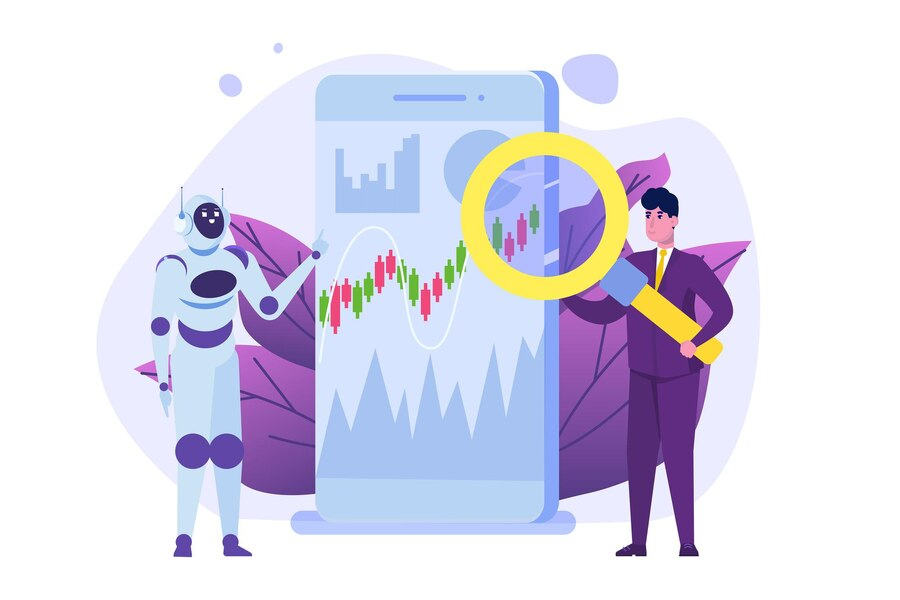

**Step-1:** Importing Libraries.

In [1]:
# Cell 1: Import necessary libraries
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import plotly.express as px
from datetime import timedelta
import ipywidgets as widgets
from IPython.display import display



**Step-2:** Fetching the Stock data for top -10 companies using YahooFinance.

In [2]:
# Cell 2: Function to get stock data
def get_stock_data(symbol, period="max"):
    return yf.download(symbol, period=period)



In [3]:
# Cell 3: Fetch and display the stock data head for each symbol
stock_symbols = ['AAPL', 'META', 'GOOGL', 'MSFT', 'TSLA', 'AMZN', 'NFLX', 'NVDA', 'INTC', 'IBM']
stock_data_dict = {}

for symbol in stock_symbols:
    stock_data = get_stock_data(symbol)
    stock_data_dict[symbol] = stock_data
    print(f"--- {symbol} Stock Data (First 5 Rows) ---")
    display(stock_data.head())  # Display the first 5 rows of each company's stock data



[*********************100%***********************]  1 of 1 completed

--- AAPL Stock Data (First 5 Rows) ---


Price      Adj Close     Close      High       Low      Open     Volume
Ticker          AAPL      AAPL      AAPL      AAPL      AAPL       AAPL
Date                                                                   
1980-12-12  0.098834  0.128348  0.128906  0.128348  0.128348  469033600
1980-12-15  0.093678  0.121652  0.122210  0.121652  0.122210  175884800
1980-12-16  0.086802  0.112723  0.113281  0.112723  0.113281  105728000
1980-12-17  0.088951  0.115513  0.116071  0.115513  0.115513   86441600
1980-12-18  0.091530  0.118862  0.119420  0.118862  0.118862   73449600

[*********************100%***********************]  1 of 1 completed

--- META Stock Data (First 5 Rows) ---


Price       Adj Close      Close       High        Low       Open     Volume
Ticker           META       META       META       META       META       META
Date                                                                        
2012-05-18  38.084522  38.230000  45.000000  38.000000  42.049999  573576400
2012-05-21  33.900501  34.029999  36.660000  33.000000  36.529999  168192700
2012-05-22  30.882032  31.000000  33.590000  30.940001  32.610001  101786600
2012-05-23  31.878229  32.000000  32.500000  31.360001  31.370001   73600000
2012-05-24  32.904308  33.029999  33.209999  31.770000  32.950001   50237200

[*********************100%***********************]  1 of 1 completed

--- GOOGL Stock Data (First 5 Rows) ---


Price      Adj Close     Close      High       Low      Open     Volume
Ticker         GOOGL     GOOGL     GOOGL     GOOGL     GOOGL      GOOGL
Date                                                                   
2004-08-19  2.501941  2.511011  2.604104  2.401401  2.502503  893181924
2004-08-20  2.700670  2.710460  2.729730  2.515015  2.527778  456686856
2004-08-23  2.727849  2.737738  2.839840  2.728979  2.771522  365122512
2004-08-24  2.614895  2.624374  2.792793  2.591842  2.783784  304946748
2004-08-25  2.643072  2.652653  2.702703  2.599600  2.626627  183772044

[*********************100%***********************]  1 of 1 completed

--- MSFT Stock Data (First 5 Rows) ---


Price      Adj Close     Close      High       Low      Open      Volume
Ticker          MSFT      MSFT      MSFT      MSFT      MSFT        MSFT
Date                                                                    
1986-03-13  0.059827  0.097222  0.101563  0.088542  0.088542  1031788800
1986-03-14  0.061963  0.100694  0.102431  0.097222  0.097222   308160000
1986-03-17  0.063032  0.102431  0.103299  0.100694  0.100694   133171200
1986-03-18  0.061429  0.099826  0.103299  0.098958  0.102431    67766400
1986-03-19  0.060361  0.098090  0.100694  0.097222  0.099826    47894400

[*********************100%***********************]  1 of 1 completed


--- TSLA Stock Data (First 5 Rows) ---


Price      Adj Close     Close      High       Low      Open     Volume
Ticker          TSLA      TSLA      TSLA      TSLA      TSLA       TSLA
Date                                                                   
2010-06-29  1.592667  1.592667  1.666667  1.169333  1.266667  281494500
2010-06-30  1.588667  1.588667  2.028000  1.553333  1.719333  257806500
2010-07-01  1.464000  1.464000  1.728000  1.351333  1.666667  123282000
2010-07-02  1.280000  1.280000  1.540000  1.247333  1.533333   77097000
2010-07-06  1.074000  1.074000  1.333333  1.055333  1.333333  103003500

[*********************100%***********************]  1 of 1 completed

--- AMZN Stock Data (First 5 Rows) ---


Price      Adj Close     Close      High       Low      Open      Volume
Ticker          AMZN      AMZN      AMZN      AMZN      AMZN        AMZN
Date                                                                    
1997-05-15  0.097917  0.097917  0.125000  0.096354  0.121875  1443120000
1997-05-16  0.086458  0.086458  0.098958  0.085417  0.098438   294000000
1997-05-19  0.085417  0.085417  0.088542  0.081250  0.088021   122136000
1997-05-20  0.081771  0.081771  0.087500  0.081771  0.086458   109344000
1997-05-21  0.071354  0.071354  0.082292  0.068750  0.081771   377064000

[*********************100%***********************]  1 of 1 completed

--- NFLX Stock Data (First 5 Rows) ---


Price      Adj Close     Close      High       Low      Open     Volume
Ticker          NFLX      NFLX      NFLX      NFLX      NFLX       NFLX
Date                                                                   
2002-05-23  1.196429  1.196429  1.242857  1.145714  1.156429  104790000
2002-05-24  1.210000  1.210000  1.225000  1.197143  1.214286   11104800
2002-05-28  1.157143  1.157143  1.232143  1.157143  1.213571    6609400
2002-05-29  1.103571  1.103571  1.164286  1.085714  1.164286    6757800
2002-05-30  1.071429  1.071429  1.107857  1.071429  1.107857   10154200

[*********************100%***********************]  1 of 1 completed

--- NVDA Stock Data (First 5 Rows) ---


Price      Adj Close     Close      High       Low      Open      Volume
Ticker          NVDA      NVDA      NVDA      NVDA      NVDA        NVDA
Date                                                                    
1999-01-22  0.037615  0.041016  0.048828  0.038802  0.043750  2714688000
1999-01-25  0.041556  0.045313  0.045833  0.041016  0.044271   510480000
1999-01-26  0.038331  0.041797  0.046745  0.041146  0.045833   343200000
1999-01-27  0.038212  0.041667  0.042969  0.039583  0.041927   244368000
1999-01-28  0.038092  0.041536  0.041927  0.041276  0.041667   227520000

[*********************100%***********************]  1 of 1 completed

--- INTC Stock Data (First 5 Rows) ---


Price      Adj Close     Close      High       Low      Open    Volume
Ticker          INTC      INTC      INTC      INTC      INTC      INTC
Date                                                                  
1980-03-17  0.181500  0.325521  0.330729  0.325521  0.325521  10924800
1980-03-18  0.180048  0.322917  0.328125  0.322917  0.325521  17068800
1980-03-19  0.184403  0.330729  0.335938  0.330729  0.330729  18508800
1980-03-20  0.183678  0.329427  0.334635  0.329427  0.330729  11174400
1980-03-21  0.177143  0.317708  0.322917  0.317708  0.322917  12172800

[*********************100%***********************]  1 of 1 completed

--- IBM Stock Data (First 5 Rows) ---


Price      Adj Close     Close      High       Low      Open  Volume
Ticker           IBM       IBM       IBM       IBM       IBM     IBM
Date                                                                
1962-01-02  1.513319  7.291268  7.374124  7.291268  7.374124  407940
1962-01-03  1.526550  7.355003  7.355003  7.291268  7.291268  305955
1962-01-04  1.511336  7.281708  7.355003  7.278521  7.355003  274575
1962-01-05  1.481574  7.138305  7.272148  7.125558  7.272148  384405
1962-01-08  1.453793  7.004461  7.131931  6.947100  7.131931  572685

**Step-3:** Creating LSTM Model.

In [4]:
# Cell 4: Define helper functions for data preparation and model creation
def prepare_data(data, n_steps):
    x, y = [], []
    for i in range(len(data) - n_steps):
        x.append(data[i:(i + n_steps), 0])
        y.append(data[i + n_steps, 0])
    return np.array(x), np.array(y)

def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(units=50))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model



**Step-4:** Training LSTM Model.

In [5]:
# Cell 5: Training and evaluating LSTM models for each stock symbol
n_steps = 60
models = {}
scalers = {}
for stock_symbol in stock_symbols:
    stock_data = stock_data_dict[stock_symbol]
    closing_prices = stock_data['Close'].values.reshape(-1, 1)
    scaler = MinMaxScaler(feature_range=(0, 1))
    closing_prices_scaled = scaler.fit_transform(closing_prices)
    x_train, y_train = prepare_data(closing_prices_scaled, n_steps)
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

    # Create and train the LSTM model
    model = create_lstm_model((x_train.shape[1], 1))
    print(f"--- Model Summary for {stock_symbol} ---")
    model.summary()  # Print the model summary

    model.fit(x_train, y_train, epochs=10, batch_size=32, verbose=0)

    # Save the model and scaler for later use
    models[stock_symbol] = model
    scalers[stock_symbol] = scaler

    # Predictions and performance metrics
    train_predictions = model.predict(x_train)
    train_predictions = scaler.inverse_transform(train_predictions)
    mse = mean_squared_error(closing_prices[n_steps:], train_predictions)
    mae = mean_absolute_error(closing_prices[n_steps:], train_predictions)

    print(f"--- Model Performance for {stock_symbol} ---")
    print(f"Mean Squared Error: {mse}")
    print(f"Mean Absolute Error: {mae}")

--- Model Summary for AAPL ---


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

345/345 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step
--- Model Performance for AAPL ---
Mean Squared Error: 1.6814315568015865
Mean Absolute Error: 0.7024033463861731
--- Model Summary for META ---


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step
--- Model Performance for META ---
Mean Squared Error: 233.0008141239544
Mean Absolute Error: 10.115258438635502
--- Model Summary for GOOGL ---


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

159/159 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step
--- Model Performance for GOOGL ---
Mean Squared Error: 5.449979994895296
Mean Absolute Error: 1.3687210117868462
--- Model Summary for MSFT ---


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                        │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

304/304 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step
--- Model Performance for MSFT ---
Mean Squared Error: 15.6417613375297
Mean Absolute Error: 2.8511590470278074
--- Model Summary for TSLA ---


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                        │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step
--- Model Performance for TSLA ---
Mean Squared Error: 62.625032508485624
Mean Absolute Error: 4.244167600826418
--- Model Summary for AMZN ---


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_10 (LSTM)                       │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_11 (LSTM)                       │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

216/216 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step
--- Model Performance for AMZN ---
Mean Squared Error: 5.691323066970084
Mean Absolute Error: 1.3608443816652902
--- Model Summary for NFLX ---


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                       │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_13 (LSTM)                       │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

176/176 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step
--- Model Performance for NFLX ---
Mean Squared Error: 97.64281228715606
Mean Absolute Error: 4.743914729706447
--- Model Summary for NVDA ---


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_14 (LSTM)                       │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_15 (LSTM)                       │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

202/202 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step
--- Model Performance for NVDA ---
Mean Squared Error: 2.2187965220376764
Mean Absolute Error: 0.45194227835471895
--- Model Summary for INTC ---


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_16 (LSTM)                       │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_17 (LSTM)                       │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

351/351 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step
--- Model Performance for INTC ---
Mean Squared Error: 0.587576664278451
Mean Absolute Error: 0.5218204601376737
--- Model Summary for IBM ---


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_18 (LSTM)                       │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_19 (LSTM)                       │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

494/494 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step
--- Model Performance for IBM ---
Mean Squared Error: 6.336100958423488
Mean Absolute Error: 1.5670947477810289


**Step-5:** Predicting Stock Prices and Ploting the Prices using Plotly Express.

In [6]:
# Cell 6: Plotly interactive plots with extended prediction period
for stock_symbol in stock_symbols:
    stock_data = stock_data_dict[stock_symbol]
    closing_prices = stock_data['Close'].values.reshape(-1, 1)
    scaler = scalers[stock_symbol]
    closing_prices_scaled = scaler.transform(closing_prices)
    x_train, y_train = prepare_data(closing_prices_scaled, n_steps)
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

    # Predictions for training data
    model = models[stock_symbol]
    train_predictions = model.predict(x_train)
    train_predictions = scaler.inverse_transform(train_predictions)

    # Extend prediction for the next 6 months
    future_data = closing_prices_scaled[-n_steps:].reshape(1, n_steps, 1)
    future_predictions = []

    for _ in range(180):  # Predicting for 180 days (approximately 6 months)
        prediction = model.predict(future_data)
        future_predictions.append(prediction[0, 0])

        # Properly reshape and update future_data
        prediction_reshaped = prediction.reshape(1, 1, 1)  # Reshaping prediction to match dimensions
        future_data = np.append(future_data[:, 1:, :], prediction_reshaped, axis=1)  # Append reshaped prediction

    future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

    # Prepare plot data
    dates = stock_data.index[n_steps:]
    future_dates = pd.date_range(start=dates[-1] + timedelta(days=1), periods=180, freq='B')
    actual_prices = closing_prices[n_steps:].flatten()
    predicted_prices = train_predictions.flatten()
    future_prices = future_predictions.flatten()

    plot_data = pd.DataFrame({
        'Date': np.concatenate((dates, future_dates)),
        'Actual Prices': np.concatenate((actual_prices, [np.nan] * 180)),
        'Predicted Prices': np.concatenate((predicted_prices, future_prices))
    }).melt(id_vars='Date', value_vars=['Actual Prices', 'Predicted Prices'],
            var_name='Type', value_name='Stock Price (USD)')

    # Plot using Plotly
    fig = px.line(plot_data, x='Date', y='Stock Price (USD)', color='Type',
                  title=f'{stock_symbol} Stock Price Prediction with Future Projections')
    fig.update_layout(xaxis_title="Date", yaxis_title="Stock Price (USD)", template="plotly_dark")
    fig.show()


345/345 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━

98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━

159/159 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━

304/304 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━

113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━

216/216 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━

176/176 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━

202/202 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━

351/351 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━

494/494 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━

**step-6:** Craeting interctive Price Prediction System using IPy Widgets.

In [7]:
import ipywidgets as widgets
from datetime import timedelta
import pandas as pd
import numpy as np
from IPython.display import display, HTML

# Cell 7: Interactive Widget for Predictions based on user-selected date

# Explanation text for the widgets
explanation_text = """
### Stock Price Prediction

Select a company and choose a date to predict its stock price on the selected date.

- **Company**: Choose a stock from the dropdown list.
- **Select Date**: Pick a date to predict the stock price of the selected company.

After selecting the company and the date, click on **"Predict Stock Price"** to see the prediction.
"""

# Display explanation text
display(HTML(f"<div style='font-size: 16px; padding: 10px;'>{explanation_text}</div>"))

# Dropdown for company selection
symbol_dropdown = widgets.Dropdown(options=stock_symbols, description='Company:')

# Date picker for selecting the date
date_picker = widgets.DatePicker(description='Select Date:', disabled=False)

# Button to trigger prediction
predict_button = widgets.Button(description="Predict Stock Price", button_style='success', layout=widgets.Layout(width='20%'))

# Function to handle prediction when button is clicked
def predict_selected_date(symbol, selected_date):
    stock_data = stock_data_dict[symbol]
    closing_prices = stock_data['Close'].values.reshape(-1, 1)
    scaler = scalers[symbol]
    closing_prices_scaled = scaler.transform(closing_prices)
    model = models[symbol]

    # Convert the selected date to a pandas Timestamp
    selected_date = pd.to_datetime(selected_date)

    # Ensure stock_data.index is in the same format as selected_date (naive or aware)
    if stock_data.index.tz is not None:  # If the stock data is timezone-aware
        selected_date = selected_date.tz_localize('UTC')  # Change this to match the data's timezone
    else:  # If the stock data is naive
        selected_date = selected_date.tz_localize(None)  # Remove timezone info from selected_date

    # Prepare recent data for prediction
    future_data = closing_prices_scaled[-n_steps:].reshape(1, n_steps, 1)

    while stock_data.index[-1] < selected_date:
        prediction = model.predict(future_data)
        predicted_value = scaler.inverse_transform(prediction)[0, 0]

        # Create a new DataFrame with the predicted value
        new_row = pd.DataFrame({'Close': [predicted_value]}, index=[stock_data.index[-1] + timedelta(days=1)])

        # Use pd.concat to append the new row to the existing DataFrame
        stock_data = pd.concat([stock_data, new_row])

        # Reshape the prediction to match the 3D shape of future_data
        future_data = np.append(future_data[:, 1:, :], prediction.reshape(1, 1, 1), axis=1)

    # Get predicted price
    predicted_price = stock_data.loc[selected_date, 'Close']
    print(f"Predicted price of {symbol} on {selected_date.strftime('%Y-%m-%d')}: ${predicted_price:.2f}")

# Callback function for the button
def on_button_click(b):
    predict_selected_date(symbol_dropdown.value, date_picker.value)

# Button click event
predict_button.on_click(on_button_click)

# Display widgets
display(symbol_dropdown, date_picker, predict_button)


Dropdown(description='Company:', options=('AAPL', 'META', 'GOOGL', 'MSFT', 'TSLA', 'AMZN', 'NFLX', 'NVDA', 'IN…

DatePicker(value=None, description='Select Date:')

Button(button_style='success', description='Predict Stock Price', layout=Layout(width='20%'), style=ButtonStyl…

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━